In [3]:
import pandas as pd
import matplotlib.pyplot as plt

### Data Import: Import the data in .csv format into Pandas dataframe for futher processing

In [4]:
train = pd.read_csv('/content/drive/My Drive/Python/TEMP/data/train.csv', index_col=0)
train.head()

,date,speed
id,,
0,1/1/2017 0:00,43.002930
1,1/1/2017 1:00,46.118696
2,1/1/2017 2:00,44.294158
3,1/1/2017 3:00,41.067468
4,1/1/2017 4:00,46.448653


### Data Cleansing: Converting the date column into appropriate datetime format

In [5]:
train.dtypes

date      object
speed    float64
dtype: object

In [6]:
train['date'] =  pd.to_datetime(train['date'], format='%d/%m/%Y %H:%M')

In [7]:
train.dtypes

date     datetime64[ns]
speed           float64
dtype: object

In [8]:
train.head()

,date,speed
id,,
0,2017-01-01 00:00:00,43.002930
1,2017-01-01 01:00:00,46.118696
2,2017-01-01 02:00:00,44.294158
3,2017-01-01 03:00:00,41.067468
4,2017-01-01 04:00:00,46.448653


### Data Manipulation: Break down the date column into multiple fields with different granularity

In [9]:
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['weekday'] = train['date'].dt.dayofweek
train['hour'] = train['date'].dt.hour

In [10]:
train.head()

,date,speed,year,month,weekday,hour
id,,,,,,
0,2017-01-01 00:00:00,43.002930,2017,1,6,0
1,2017-01-01 01:00:00,46.118696,2017,1,6,1
2,2017-01-01 02:00:00,44.294158,2017,1,6,2
3,2017-01-01 03:00:00,41.067468,2017,1,6,3
4,2017-01-01 04:00:00,46.448653,2017,1,6,4


### Exploratory Data Analysis: Discovering relationship through data visualization

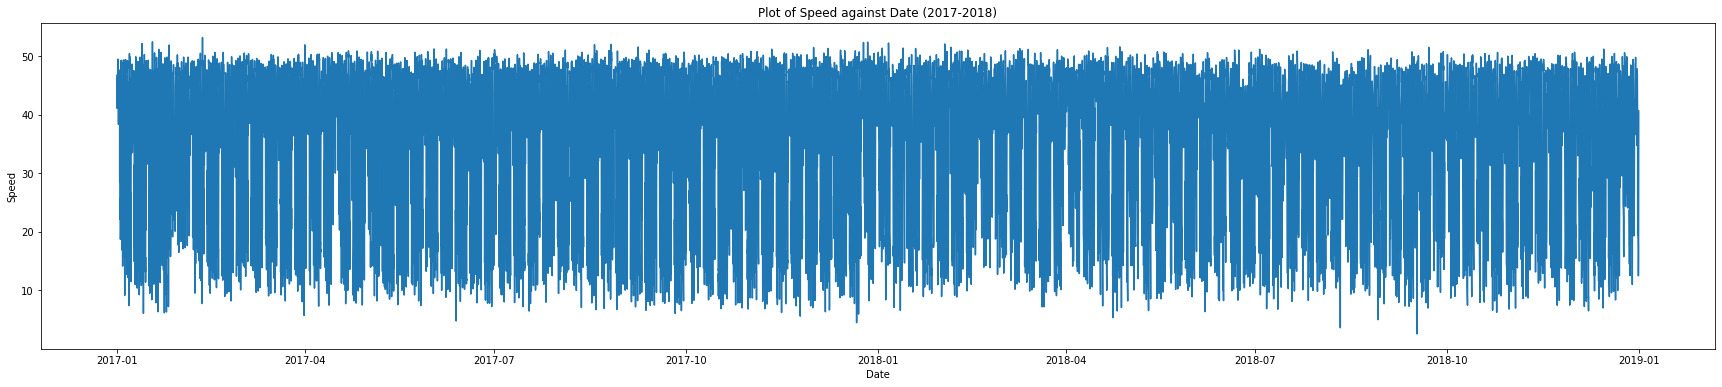

In [11]:
fig, ax = plt.subplots(figsize = (30, 6))
ax.plot(train['date'], train['speed'])
ax.set_title('Plot of Speed against Date (2017-2018)')
ax.set_xlabel('Date')
ax.set_ylabel('Speed')
plt.show()

<b>Observation (Plot of Speed againt Date (2017-2018)):</b>
- Trend component is insignificant in the above plot. No clear upward/downward trend in speed is observed.
- A seasonal component may exist as a regular pattern of increase/decrease in speed is observed.

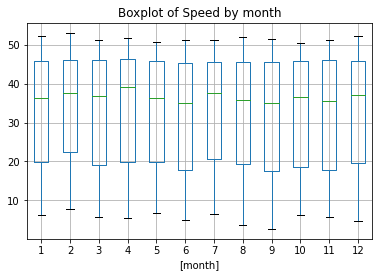

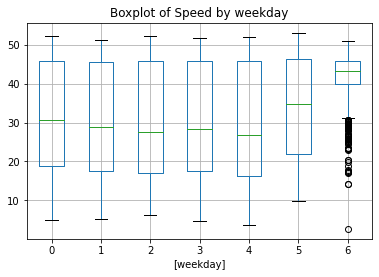

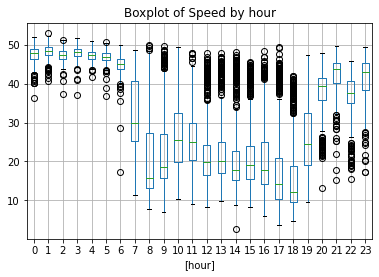

In [12]:
groups = ['month', 'weekday', 'hour']
for gp in groups:
    train.boxplot(column=['speed'], by=[gp])
    plt.title('Boxplot of Speed by ' + gp)
    plt.suptitle("")
    plt.show()

<b>Observation (Boxplot of Speed by Month, Weekday, Hour):</b>
- From the Boxplot of Speed by Month, it is observed that the distribution of speed across different months is quite similar. Month may not be a factor contributing to the seasonal (repeated) pattern.
- From the Boxplot of Speed by Weekday, it is observed that speed is slightly higher on Saturday and significantly higher on Sunday. Weekday is a possible factor contributing to the seasonal (repeated) pattern.
- From the Boxplot of Speed by Hour, it is observed that speed is significantly lower during the period of 7-19. Hour is likely to be a factor contributing to the seasonal (repeated) pattern.

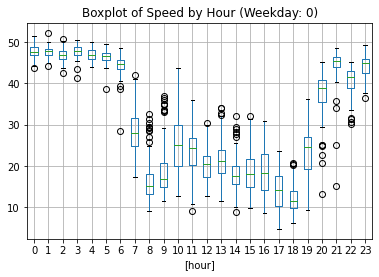

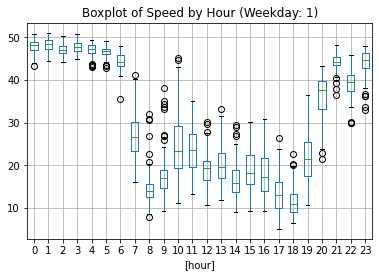

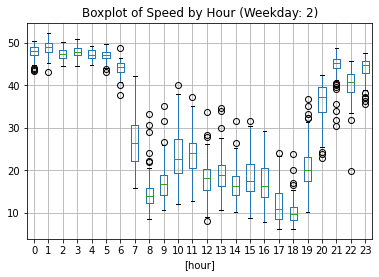

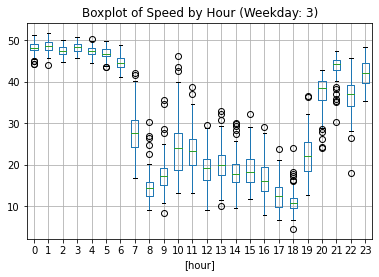

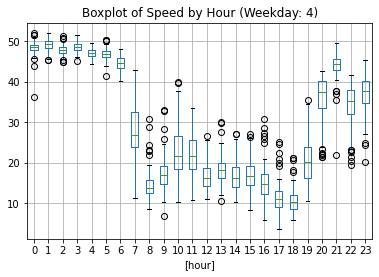

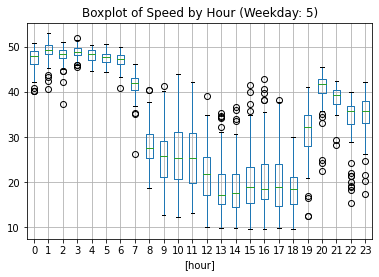

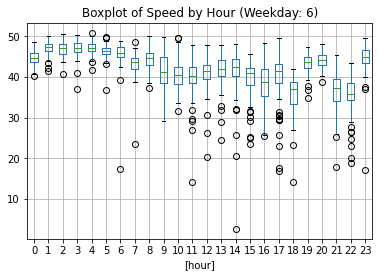

In [13]:
for wd in sorted(train['weekday'].unique()):
    train_temp = train[train['weekday'] == wd]
    train_temp.boxplot(column=['speed'], by=['hour'])
    plt.title('Boxplot of Speed by Hour (Weekday: ' + str(wd) + ')')
    plt.suptitle("")
    plt.show()

<b>Observation (Boxplot of Speed by Hour Group by Weekday)</b>
- For Monday to Friday, it is observered that speed is significantly lower during the period of 7-19.
- For Saturday, it is observed that speed is significantly lower during the period of 8-19.
- For Sunday, no time period with significantly lower speed is observed. Most of the median speed are close to or above 40.

### Data Manipulation: Separating Holiday Data for Observing its Effect on Road Speed
- The Hong Kong holiday data is retrieved from GovHK/香港政府一站通 (https://www.gov.hk/en/about/abouthk/holiday/)

In [14]:
holiday_2017 = pd.read_csv('/content/drive/My Drive/Python/TEMP/data/holiday_2017.csv')
holiday_2018 = pd.read_csv('/content/drive/My Drive/Python/TEMP/data/holiday_2018.csv')
holiday_2017['date'] =  pd.to_datetime(holiday_2017['date'], format='%d/%m/%Y')
holiday_2018['date'] =  pd.to_datetime(holiday_2018['date'], format='%d/%m/%Y')
holiday = pd.concat([holiday_2017, holiday_2018], ignore_index=True)
holiday['date'] = holiday.date.dt.strftime('%d/%m/%Y')

In [15]:
train['date_only'] = train['date'].dt.normalize()
train['date_only'] = train.date_only.dt.strftime('%d/%m/%Y')
train_holiday = train[train.date_only.isin(holiday['date'].tolist())]
train_xholiday = train[~train.date_only.isin(holiday['date'].tolist())]

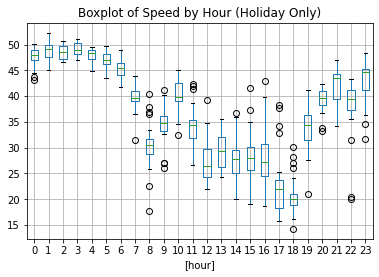

In [16]:
train_holiday.boxplot(column=['speed'], by=['hour'])
plt.title('Boxplot of Speed by Hour (Holiday Only)')
plt.suptitle("")
plt.show()

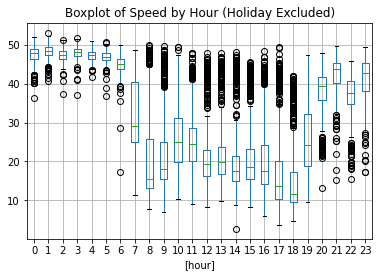

In [17]:
train_xholiday.boxplot(column=['speed'], by=['hour'])
plt.title('Boxplot of Speed by Hour (Holiday Excluded)')
plt.suptitle("")
plt.show()

<b>Observation (Boxplot of Speed by Hour Group by Holiday)</b>
- From the boxplots above, it seems that for the holiday data, the plot of speed by hour is less dispersed and has less outlier.
- It may worth separating out the holiday data in prediction.

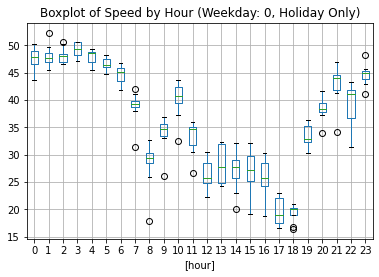

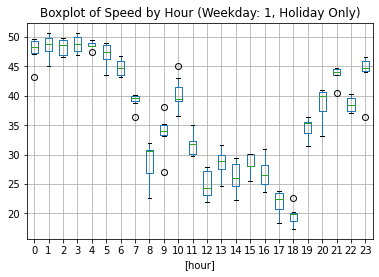

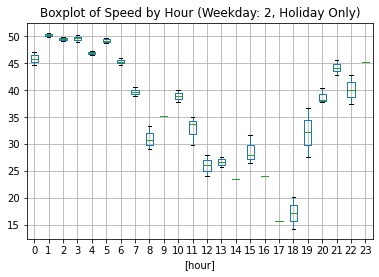

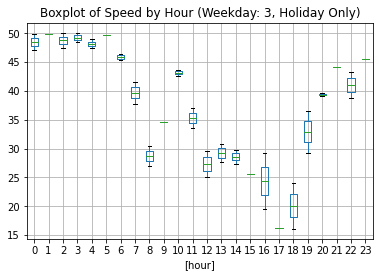

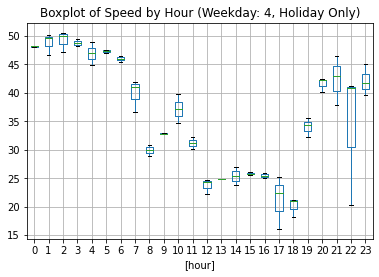

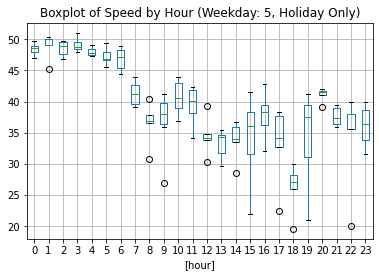

In [18]:
for wd in sorted(train_holiday['weekday'].unique()):
    train_holiday_temp = train_holiday[train_holiday['weekday'] == wd]
    train_holiday_temp.boxplot(column=['speed'], by=['hour'])
    plt.title('Boxplot of Speed by Hour (Weekday: ' + str(wd) + ', Holiday Only)')
    plt.suptitle("")
    plt.show()

<b>Observation (Boxplot of Speed by Hour Group by Weekday, Holiday Data Only)</b>
- From the plots above, it seems that the distribution of speed across different hours in different weekdays show similar pattern.
- Therefore, it may not be necessary to divide speed of the holiday data by different weekdays in subsequent analysis/prediction

### Data Manipulation: Separating Day with Rainfall for Observing its Effect on Road Speed
- The rainfall data is extracted from Hong Kong Observatory

In [19]:
rainfall = pd.read_csv('/content/drive/My Drive/Python/TEMP/data/rainfall.csv')
rainfall['date'] =  pd.to_datetime(rainfall['date'], format='%d/%m/%Y')
rainfall['date_only'] = rainfall.date.dt.strftime('%d/%m/%Y')
del rainfall['date']

In [20]:
train_xholiday_rainy = pd.merge(train_xholiday, rainfall, on="date_only")
train_xholiday_rainy['rainy'] = train_xholiday_rainy.apply(lambda row: True if row.rainfall >= 30.0 else False, axis=1)

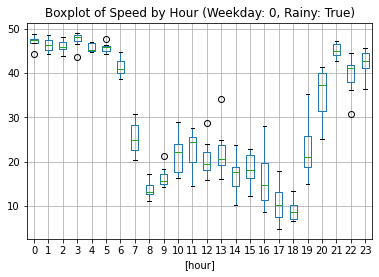

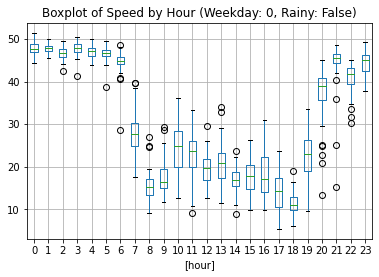

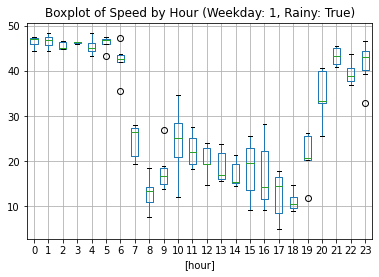

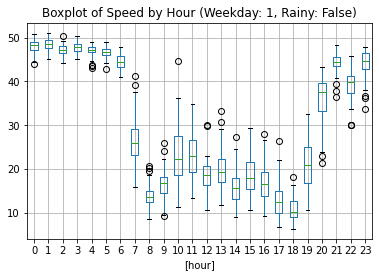

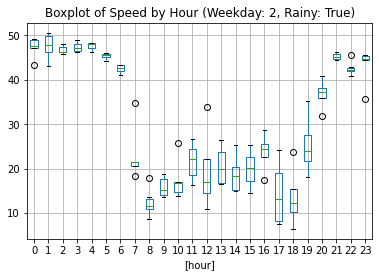

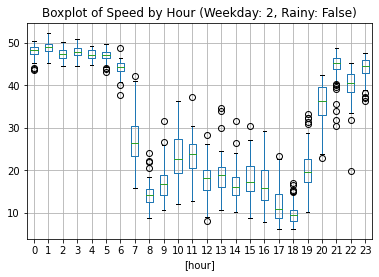

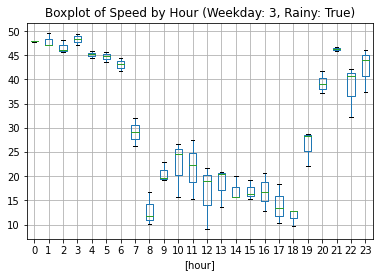

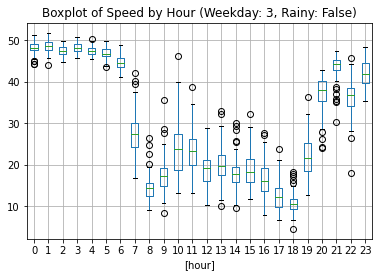

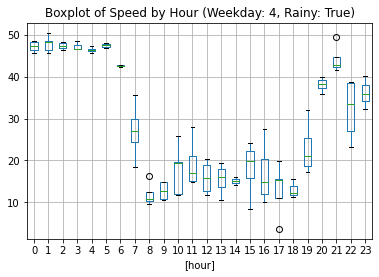

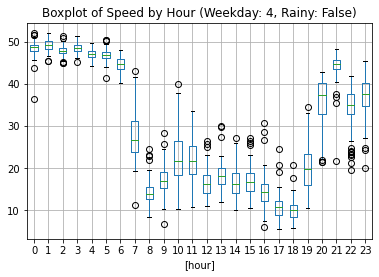

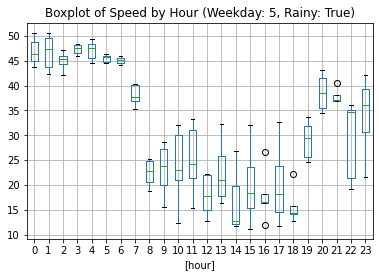

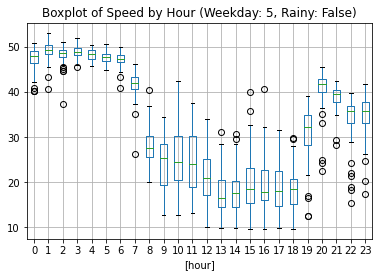

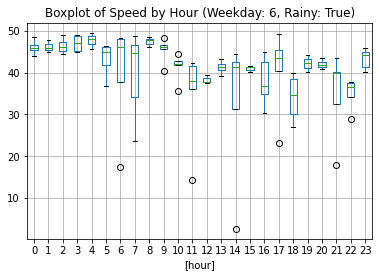

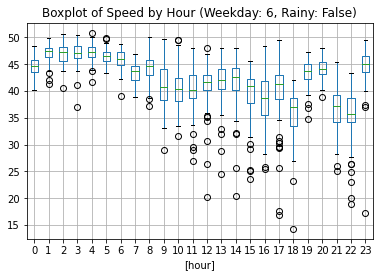

In [21]:
for wd in sorted(train_xholiday_rainy['weekday'].unique()):
    for r in [True, False]:
        train_temp = train_xholiday_rainy[(train_xholiday_rainy['weekday'] == wd) & (train_xholiday_rainy['rainy'] == r)]
        train_temp.boxplot(column=['speed'], by=['hour'])
        plt.title('Boxplot of Speed by Hour (Weekday: ' + str(wd) + ', Rainy: ' + str(r) + ')')
        plt.suptitle("")
        plt.show()

In [22]:
train_holiday_rainy = pd.merge(train_holiday, rainfall, on="date_only")
train_holiday_rainy['rainy'] = train_holiday_rainy.apply(lambda row: True if row.rainfall >= 30.0 else False, axis=1)
print(train_holiday_rainy[train_xholiday_rainy['rainy'] == True].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       0 non-null      datetime64[ns]
 1   speed      0 non-null      float64       
 2   year       0 non-null      int64         
 3   month      0 non-null      int64         
 4   weekday    0 non-null      int64         
 5   hour       0 non-null      int64         
 6   date_only  0 non-null      object        
 7   rainfall   0 non-null      float64       
 8   rainy      0 non-null      bool          
dtypes: bool(1), datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 0.0+ bytes
None


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


### Prediction

In [23]:
xholiday_predict = train_xholiday_rainy.groupby(['weekday', 'hour', 'rainy'], as_index=False)[['speed']].median()

In [24]:
holiday_predict = train_holiday.groupby(['hour'], as_index=False)[['speed']].median()

In [25]:
xholiday_predict

,weekday,hour,rainy,speed
0,0,0,False,47.587571
1,0,0,True,47.518455
2,0,1,False,47.791062
3,0,1,True,46.207402
4,0,2,False,46.797938
...,...,...,...,...
331,6,21,True,39.831104
332,6,22,False,35.691463
333,6,22,True,36.573800
334,6,23,False,45.132916


In [26]:
holiday_predict

,hour,speed
0,0,48.052721
1,1,49.095275
2,2,48.513342
3,3,49.026440
4,4,48.414328
5,5,46.961950
6,6,45.410684
7,7,39.664833
8,8,30.534474
9,9,34.702416


In [27]:
train['holiday'] = train.date_only.isin(holiday['date'].tolist())
train = pd.merge(train, rainfall, on="date_only")
train.head()

,date,speed,year,month,weekday,hour,date_only,holiday,rainfall
0,2017-01-01 00:00:00,43.002930,2017,1,6,0,01/01/2017,False,0.0
1,2017-01-01 01:00:00,46.118696,2017,1,6,1,01/01/2017,False,0.0
2,2017-01-01 02:00:00,44.294158,2017,1,6,2,01/01/2017,False,0.0
3,2017-01-01 03:00:00,41.067468,2017,1,6,3,01/01/2017,False,0.0
4,2017-01-01 04:00:00,46.448653,2017,1,6,4,01/01/2017,False,0.0


In [28]:
train['rainy'] = train.apply(lambda row: True if row.rainfall >= 30.0 else False, axis=1)
train.head()

,date,speed,year,month,weekday,hour,date_only,holiday,rainfall,rainy
0,2017-01-01 00:00:00,43.002930,2017,1,6,0,01/01/2017,False,0.0,False
1,2017-01-01 01:00:00,46.118696,2017,1,6,1,01/01/2017,False,0.0,False
2,2017-01-01 02:00:00,44.294158,2017,1,6,2,01/01/2017,False,0.0,False
3,2017-01-01 03:00:00,41.067468,2017,1,6,3,01/01/2017,False,0.0,False
4,2017-01-01 04:00:00,46.448653,2017,1,6,4,01/01/2017,False,0.0,False


In [29]:
def predict(row):
    holiday = row['holiday']
    rainy = row['rainy']
    weekday = row['weekday']
    hour = row['hour']
    if holiday == True:
        return holiday_predict.query('hour == ' + str(hour))['speed'].values[0]
    else:
        return xholiday_predict.query('weekday == ' + str(weekday) + ' and hour == ' + str(hour)+ ' and rainy == ' + str(rainy))['speed'].values[0]

train['speed_predicted'] = train.apply(predict, axis=1)

In [30]:
train.head()

,date,speed,year,month,weekday,hour,date_only,holiday,rainfall,rainy,speed_predicted
0,2017-01-01 00:00:00,43.002930,2017,1,6,0,01/01/2017,False,0.0,False,44.707802
1,2017-01-01 01:00:00,46.118696,2017,1,6,1,01/01/2017,False,0.0,False,47.380335
2,2017-01-01 02:00:00,44.294158,2017,1,6,2,01/01/2017,False,0.0,False,47.195278
3,2017-01-01 03:00:00,41.067468,2017,1,6,3,01/01/2017,False,0.0,False,47.137240
4,2017-01-01 04:00:00,46.448653,2017,1,6,4,01/01/2017,False,0.0,False,47.225106


In [31]:
Train_MSE = (train['speed_predicted']-train['speed']).pow(2).sum()/train.shape[0]
print(Train_MSE)

14.387452817278357


### Make Prediction on the Testing Dataset

In [32]:
test = pd.read_csv('/content/drive/My Drive/Python/TEMP/data/test.csv', index_col=0)

In [33]:
test.head()
test['date'] =  pd.to_datetime(test['date'], format='%d/%m/%Y %H:%M')
test['weekday'] = test['date'].dt.dayofweek
test['hour'] = test['date'].dt.hour
test['date_only'] = test['date'].dt.normalize()
test['date_only'] = test.date_only.dt.strftime('%d/%m/%Y')
test['holiday'] = test.date_only.isin(holiday['date'].tolist())
test = pd.merge(test, rainfall, on="date_only")
test['rainy'] = test.apply(lambda row: True if row.rainfall >= 30.0 else False, axis=1)
test['speed'] = test.apply(predict, axis=1)

In [34]:
test.head()

,date,weekday,hour,date_only,holiday,rainfall,rainy,speed
0,2018-01-01 02:00:00,0,2,01/01/2018,True,0.0,False,48.513342
1,2018-01-01 05:00:00,0,5,01/01/2018,True,0.0,False,46.961950
2,2018-01-01 07:00:00,0,7,01/01/2018,True,0.0,False,39.664833
3,2018-01-01 08:00:00,0,8,01/01/2018,True,0.0,False,30.534474
4,2018-01-01 10:00:00,0,10,01/01/2018,True,0.0,False,39.873531


In [35]:
test_output = test[['speed']]
test_output.to_csv('Submission.csv')